# Segunda parte: pruebas en dataset

In [1]:
#Tratamiento de filesystem
#import os
#import sys
#sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))
##%load_ext autoreload
#%autoreload 2

import Recursos
#Tratamientos de datos
import numpy as np
#Gráficos
import matplotlib.pyplot as plt
import scipy.stats as stats
#Modelos
from sklearn.mixture import GaussianMixture
import seaborn as sns
import pandas as pd

In [2]:
planilla = pd.read_csv('documents/planilla_imagenes_2.csv',  sep=';')
df = pd.DataFrame(planilla.values, columns = list(planilla))
#se obtiene la lista de imagenes disponibles - conjunto de 72
listaNombres = []
for tupla in df.itertuples():
    nombreImg = Recursos.obtenerNombre(tupla.PLATE_N, tupla.OBJECT)
    listaNombres.append(nombreImg)
#listaFits = Recursos.obtenerListaNombres()

In [3]:
nombreImg = listaNombres[1]
datos, nro = Recursos.getInfo(nombreImg)
pixeles = Recursos.normalize(datos)
Y = np.sum(pixeles, axis=0) #sumariza los pixels en el eje x
print(Y.min())
print(Y.min()*0.8)

538.837536521605
431.070029217284


In [4]:
print(int(Y.min()*0.8))
componentes = [nro, nro+2]
print(componentes)

431
[3, 5]


In [6]:
datos, clusters = Recursos.getInfo(nombreImg)
Y = np.sum(Recursos.normalize(datos), axis=0) 
#se crea para cada caso su nuevo dataset
Y_nuevo = (Recursos.generar_nuevos_datos(Y))
Y_copia = Y_nuevo.copy().reshape(-1,1)
componentes = [clusters, clusters+2]
#se aplica el modelo gmm
modelos = [None for i in range(len(componentes))]
for i in range(len(componentes)):
    modelos[i] = Recursos.modelo_gmm(Y_copia, componentes[i])


Dimension de los nuevos datos: (697477,)
Datos del modelo:
centroides
[[ 626.15611598]
 [ 226.89844545]
 [1005.28246226]]
%
[0.33351379 0.34426381 0.32222239]
std
[[[126.17035663]]

 [[128.11752085]]

 [[122.30751424]]]
Datos del modelo:
centroides
[[1089.19744505]
 [ 632.08694187]
 [ 898.29737581]
 [ 342.6098751 ]
 [ 130.5721627 ]]
%
[0.17138924 0.26787655 0.17868299 0.2097525  0.17229872]
std
[[[82.85074566]]

 [[94.03736732]]

 [[85.19740605]]

 [[93.0604001 ]]

 [[81.47082906]]]


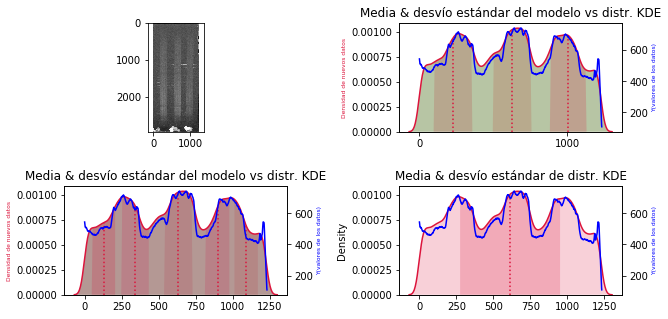

TypeError: imsave() missing 1 required positional argument: 'arr'

In [10]:
#se grafica resultados del modelo vs kde 
fig = plt.figure(nombreImg, figsize=(10,5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
#fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)

#11-imagen 
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(datos, cmap='gray')
#12-res:clusters*3
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1)
ax2 = Recursos.graficar_regiones(Y, Y_nuevo, modelos[0],componentes[0])
#21-res:clusters*3+extremos(2)
ax3 = fig.add_subplot(2, 2, 3, )
ax3 = Recursos.graficar_regiones(Y, Y_nuevo, modelos[1],componentes[1])
#22-kde
ax4 = fig.add_subplot(2, 2, 4, sharex=ax3)
ax4 = Recursos.graficar_region_kde(Y, Y_nuevo)
#fig.tight_layout() 
plt.show()
#plt.savefig('data_output/'+nombreImg+'.png')


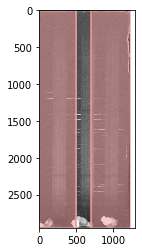

In [27]:
x0 = 500
x1 = 700
fig, ax = plt.subplots()
#lineas de corte
p1 = plt.axvline(x=x0,color='#EF9A9A')
p2 = plt.axvline(x=x1,color='#EF9A9A')

#plot imagen
ax.imshow(datos, cmap='gray')

xlim = [0, Y.size]

#xlim = ax.get_xdata()
ax.axvspan(xlim[0], x0, color='#EF9A9A', alpha=0.5)
ax.axvspan(x1, xlim[1], color='#EF9A9A', alpha=0.5)
#reset xlim
#ax.set_xlim(xlim)
plt.show()

Dimension de los nuevos datos: (696971,)
Datos del modelo:
centroides
[[1113.35415915]
 [ 468.86431547]
 [ 707.93679377]
 [ 217.0518972 ]]
%
[0.47891257 0.14758396 0.16811994 0.20538353]
std
[[[108.39714727]]

 [[ 48.21916655]]

 [[ 61.6607887 ]]

 [[ 82.87625953]]]
Datos del modelo:
centroides
[[1086.13343218]
 [ 216.76878435]
 [ 890.6575779 ]
 [ 703.18512465]
 [1236.14518153]
 [ 471.28498506]]
%
[0.32261204 0.20492697 0.04381198 0.15259655 0.12387539 0.15217707]
std
[[[59.64025763]]

 [[82.74708575]]

 [[68.12719366]]

 [[50.68344336]]

 [[89.2574792 ]]

 [[51.0560896 ]]]


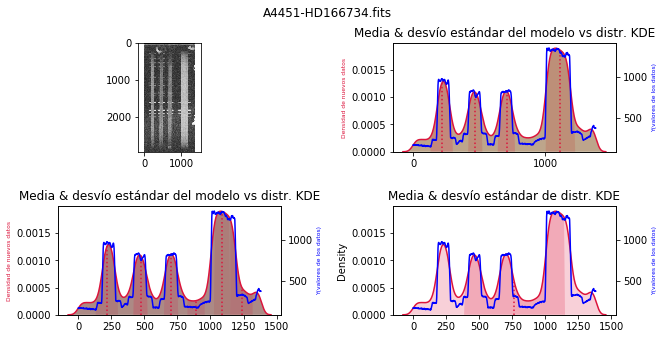

Dimension de los nuevos datos: (697477,)
Datos del modelo:
centroides
[[ 626.88364478]
 [ 227.46567571]
 [1005.51182923]]
%
[0.33286754 0.34523614 0.32189632]
std
[[[125.86259444]]

 [[128.45893692]]

 [[122.13900523]]]
Datos del modelo:
centroides
[[ 632.08694187]
 [1089.19744505]
 [ 130.5721627 ]
 [ 898.29737581]
 [ 342.6098751 ]]
%
[0.26787655 0.17138924 0.17229872 0.17868299 0.2097525 ]
std
[[[94.03736732]]

 [[82.85074566]]

 [[81.47082906]]

 [[85.19740605]]

 [[93.0604001 ]]]


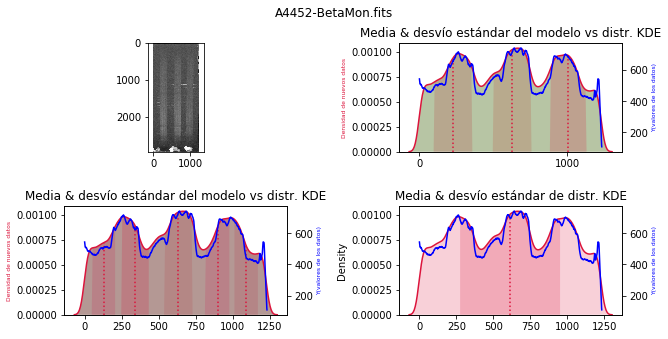

Dimension de los nuevos datos: (732548,)
Datos del modelo:
centroides
[[ 257.46735254]
 [1127.02886637]
 [ 734.08032595]]
%
[0.3932879  0.24552189 0.36119021]
std
[[[143.36309709]]

 [[124.0820805 ]]

 [[146.41442376]]]
Datos del modelo:
centroides
[[1148.22892891]
 [ 330.44213576]
 [ 601.603741  ]
 [ 122.19353448]
 [ 834.12174225]]
%
[0.22576423 0.21631243 0.17475833 0.15779346 0.22537154]
std
[[[106.67790451]]

 [[ 84.38629919]]

 [[ 96.193963  ]]

 [[ 74.60458402]]

 [[ 91.44559125]]]


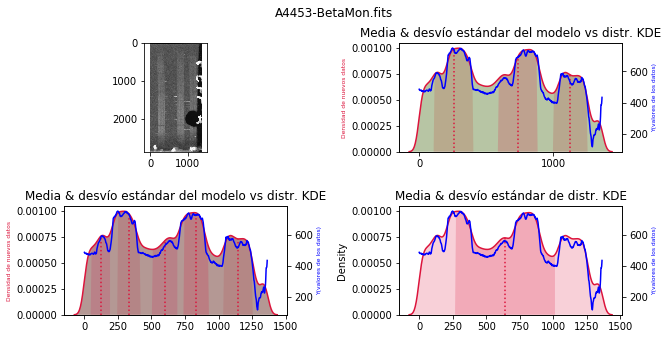

Dimension de los nuevos datos: (246157,)
Datos del modelo:
centroides
[[246.42905157]
 [791.83799748]]
%
[0.53550543 0.46449457]
std
[[[102.99379167]]

 [[144.03211588]]]
Datos del modelo:
centroides
[[746.86361217]
 [231.36906197]
 [911.32206787]
 [520.66772754]]
%
[0.19158083 0.49903608 0.20513402 0.10424907]
std
[[[67.15245249]]

 [[88.50926701]]

 [[83.75535409]]

 [[79.55058378]]]


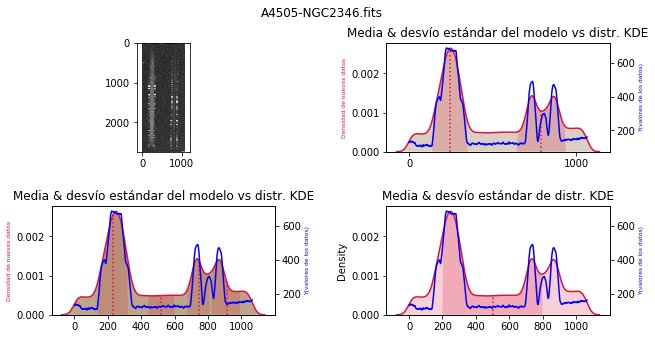

Dimension de los nuevos datos: (660652,)
Datos del modelo:
centroides
[[ 315.63323992]
 [1208.53979121]
 [ 858.13811449]]
%
[0.50030737 0.19939839 0.30029424]
std
[[[120.63304366]]

 [[ 91.77012198]]

 [[ 76.57892974]]]
Datos del modelo:
centroides
[[ 594.5384803 ]
 [1200.1645227 ]
 [ 866.38934972]
 [ 212.21029618]
 [ 328.05076644]]
%
[0.06953832 0.20858008 0.26758577 0.13769557 0.31660026]
std
[[[103.97879857]]

 [[ 98.30700286]]

 [[ 56.05290379]]

 [[112.54639849]]

 [[ 67.32060194]]]


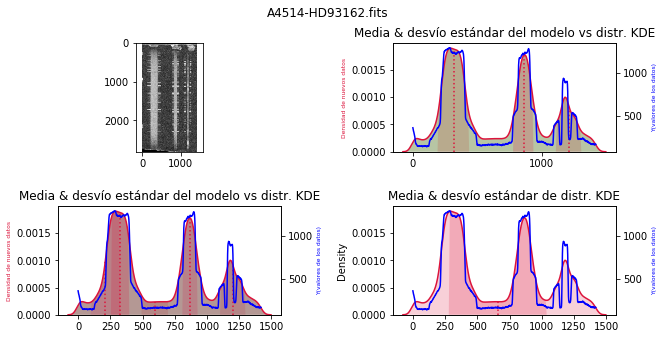

Dimension de los nuevos datos: (124714,)
Datos del modelo:
centroides
[[264.65902786]]
%
[1.]
std
[[[84.88903472]]]
Datos del modelo:
centroides
[[271.85453413]
 [ 96.57847325]
 [424.39641655]]
%
[0.78964388 0.11983366 0.09052246]
std
[[[32.7921761 ]]

 [[58.17561866]]

 [[48.77692647]]]


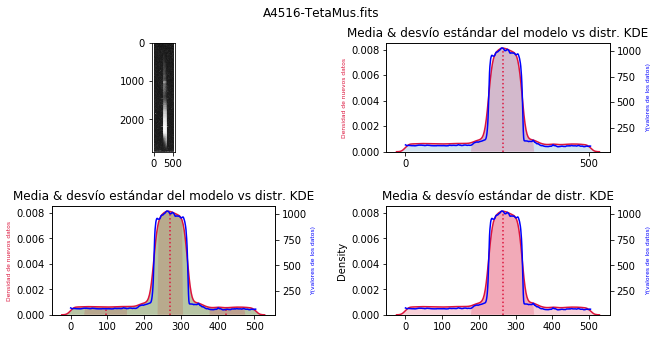

Dimension de los nuevos datos: (439707,)
Datos del modelo:
centroides
[[223.06061598]
 [887.90583252]
 [548.71239574]]
%
[0.41780124 0.25773026 0.32446849]
std
[[[ 77.9264612 ]]

 [[109.86018686]]

 [[ 57.50857967]]]
Datos del modelo:
centroides
[[ 548.54265592]
 [1011.12083733]
 [ 144.87392525]
 [ 243.52813075]
 [ 848.09104275]]
%
[0.34674207 0.07585585 0.10299779 0.30449583 0.16990847]
std
[[[66.23477697]]

 [[79.15245619]]

 [[82.6391668 ]]

 [[49.46766821]]

 [[60.90393163]]]


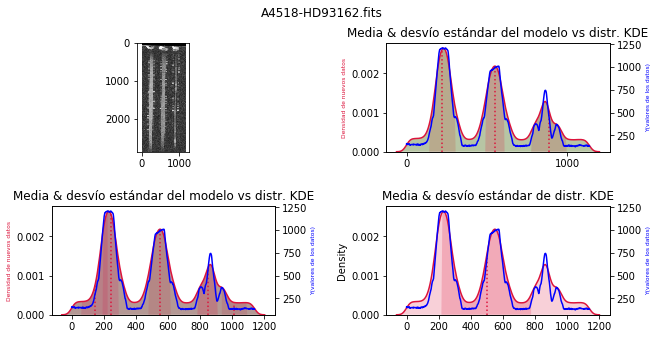

Dimension de los nuevos datos: (463335,)
Datos del modelo:
centroides
[[ 215.1951541 ]
 [ 615.39134936]
 [1005.50541857]]
%
[0.4125708  0.33186216 0.25556703]
std
[[[58.2160603 ]]

 [[58.24893016]]

 [[74.18692104]]]
Datos del modelo:
centroides
[[1011.15237493]
 [ 217.87575278]
 [ 615.7387655 ]
 [ 234.07355454]
 [ 781.57267161]]
%
[0.24794203 0.29804931 0.30610182 0.12738142 0.02052542]
std
[[[ 67.69572307]]

 [[ 31.91286403]]

 [[ 42.05201555]]

 [[120.97925021]]

 [[ 41.69656797]]]


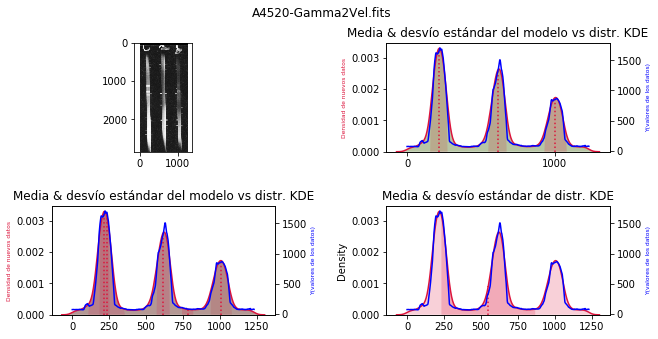

Dimension de los nuevos datos: (142865,)
Datos del modelo:
centroides
[[288.51790152]]
%
[1.]
std
[[[127.4369137]]]
Datos del modelo:
centroides
[[289.24959127]
 [ 94.93387047]
 [437.01640913]]
%
[0.55885827 0.1926956  0.24844613]
std
[[[52.73843852]]

 [[58.99629244]]

 [[72.74930615]]]


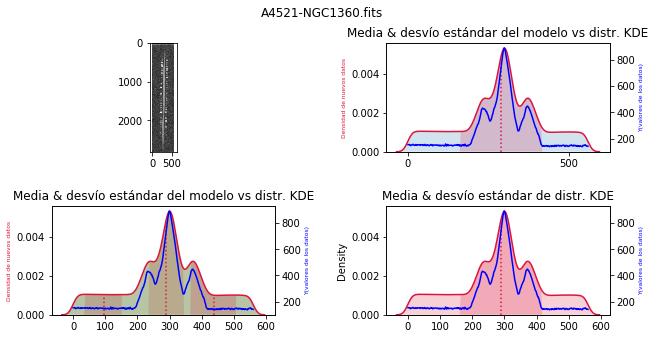

Dimension de los nuevos datos: (402359,)
Datos del modelo:
centroides
[[591.02035681]
 [247.44398362]
 [905.99411134]]
%
[0.2895665 0.3796871 0.3307464]
std
[[[ 59.14567362]]

 [[113.40697581]]

 [[ 78.27389061]]]
Datos del modelo:
centroides
[[633.67880086]
 [ 64.79671815]
 [909.58885021]
 [564.02450387]
 [279.76753319]]
%
[0.1110532  0.0722795  0.32339495 0.20239333 0.29087902]
std
[[[63.56646838]]

 [[45.30115336]]

 [[75.22851566]]

 [[56.90704865]]

 [[61.72674032]]]


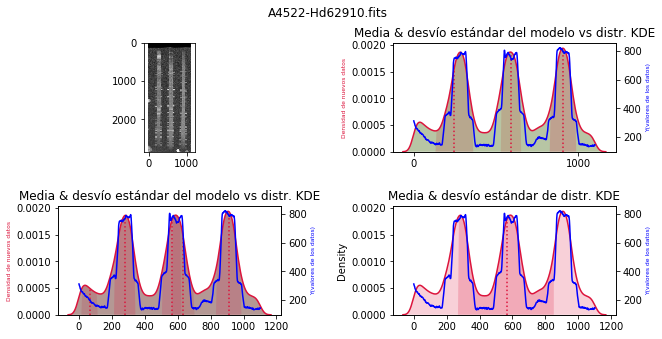

Dimension de los nuevos datos: (340438,)
Datos del modelo:
centroides
[[747.65779585]
 [259.65398595]]
%
[0.63896678 0.36103322]
std
[[[46.16553982]]

 [[94.12365956]]]
Datos del modelo:
centroides
[[748.31286141]
 [268.78125866]
 [ 85.72763357]
 [462.40761134]]
%
[0.63625687 0.28288339 0.04797415 0.03288559]
std
[[[45.12947883]]

 [[35.36804296]]

 [[55.21088346]]

 [[73.14610742]]]


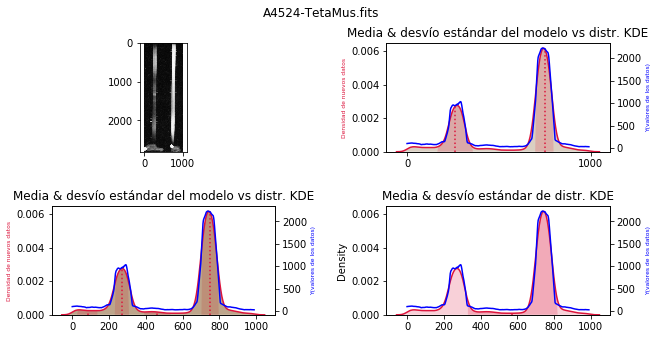

Dimension de los nuevos datos: (175675,)
Datos del modelo:
centroides
[[310.7295745]]
%
[1.]
std
[[[143.87939635]]]
Datos del modelo:
centroides
[[ 94.13885638]
 [297.72766879]
 [525.51120439]]
%
[0.15918776 0.641453   0.19935924]
std
[[[59.76239477]]

 [[61.68590996]]

 [[67.89741826]]]


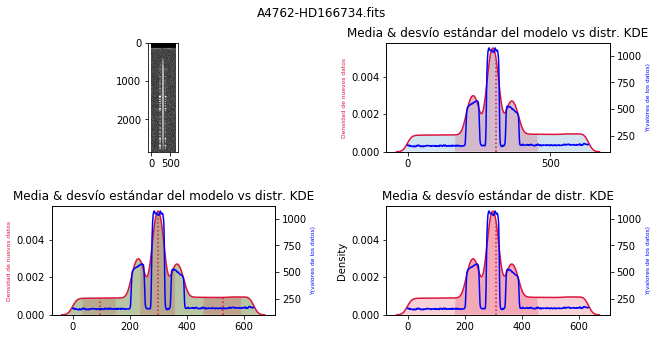

Dimension de los nuevos datos: (170248,)
Datos del modelo:
centroides
[[345.82022696]]
%
[1.]
std
[[[164.37774373]]]
Datos del modelo:
centroides
[[326.78335143]
 [501.49715874]
 [129.53906837]]
%
[0.41676892 0.36045962 0.22277146]
std
[[[86.48941926]]

 [[89.80475809]]

 [[87.0418276 ]]]


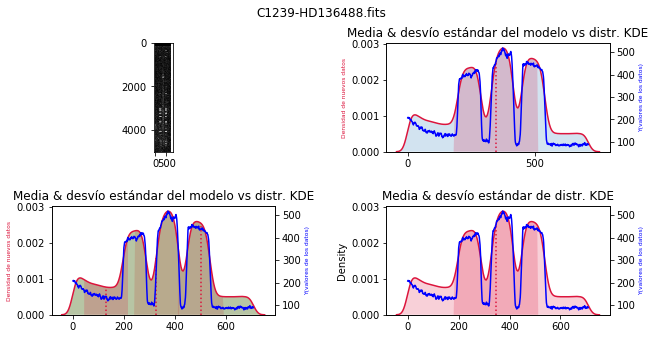

Dimension de los nuevos datos: (244191,)
Datos del modelo:
centroides
[[417.83347871]]
%
[1.]
std
[[[140.13202571]]]
Datos del modelo:
centroides
[[539.46113946]
 [284.94712926]
 [415.5991878 ]]
%
[0.36394551 0.32792985 0.30812464]
std
[[[104.04963023]]

 [[115.03716602]]

 [[ 24.22247717]]]


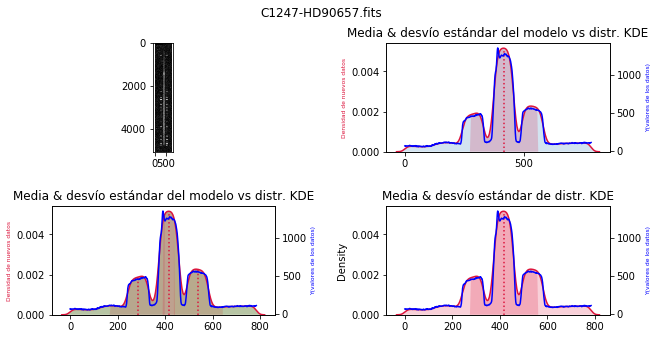

Dimension de los nuevos datos: (299752,)
Datos del modelo:
centroides
[[407.50902413]]
%
[1.]
std
[[[144.41228321]]]
Datos del modelo:
centroides
[[523.0577846 ]
 [286.42214791]
 [400.70208624]]
%
[0.42274121 0.39305112 0.18420767]
std
[[[ 99.97847909]]

 [[114.16175681]]

 [[ 22.22837566]]]


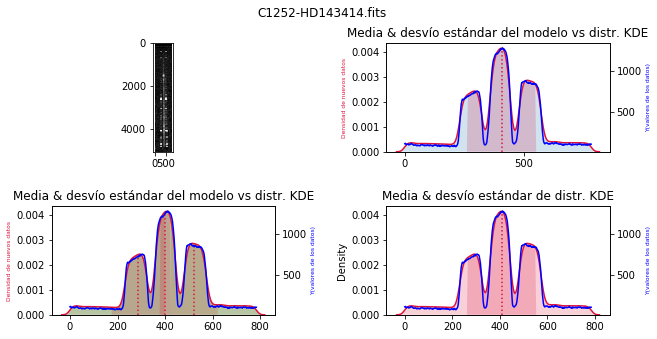

Dimension de los nuevos datos: (384595,)
Datos del modelo:
centroides
[[419.94414644]]
%
[1.]
std
[[[164.93020353]]]
Datos del modelo:
centroides
[[367.48406197]
 [544.19995344]
 [ 83.75734503]]
%
[0.50354938 0.41984904 0.07660158]
std
[[[103.57695374]]

 [[109.72334401]]

 [[ 53.52516384]]]


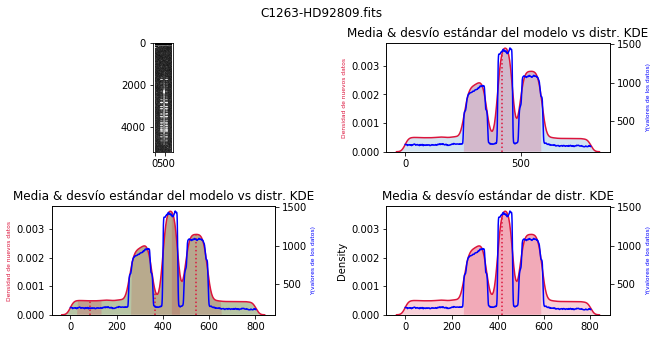

Dimension de los nuevos datos: (986420,)
Datos del modelo:
centroides
[[1432.41469035]
 [ 324.08544401]
 [ 915.52359347]]
%
[0.23620295 0.33123533 0.43256173]
std
[[[257.95375579]]

 [[192.44204049]]

 [[205.84024268]]]
Datos del modelo:
centroides
[[1230.6497707 ]
 [ 890.9578031 ]
 [ 189.99612406]
 [1668.50205774]
 [ 514.34828048]]
%
[0.21280797 0.29329273 0.17723729 0.10566798 0.21099403]
std
[[[123.61829002]]

 [[126.37456748]]

 [[126.88183635]]

 [[138.78943176]]

 [[137.44221674]]]


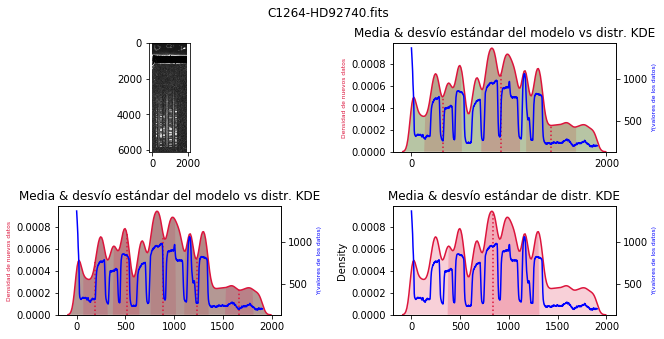

Dimension de los nuevos datos: (773441,)
Datos del modelo:
centroides
[[ 610.74226934]
 [1149.67095875]]
%
[0.51807495 0.48192505]
std
[[[293.64926697]]

 [[237.29920757]]]
Datos del modelo:
centroides
[[1144.58226106]
 [ 235.41184662]
 [ 722.07983388]
 [1521.33825083]]
%
[0.36833355 0.136451   0.42118409 0.07403136]
std
[[[138.37275085]]

 [[142.90955785]]

 [[159.45107159]]

 [[ 76.85085938]]]


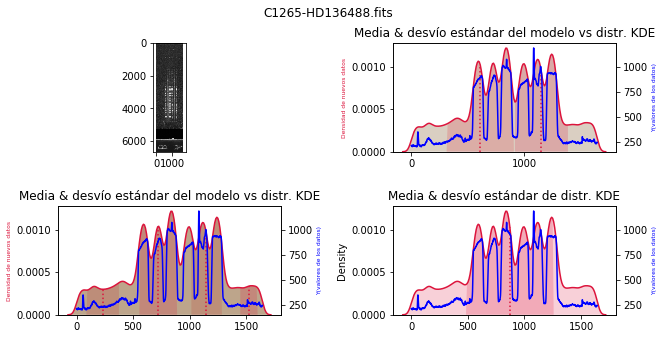

Dimension de los nuevos datos: (387755,)
Datos del modelo:
centroides
[[405.15293162]]
%
[1.]
std
[[[167.82137255]]]
Datos del modelo:
centroides
[[551.10377166]
 [190.80010589]
 [382.24997795]]
%
[0.38265503 0.21786277 0.39948219]
std
[[[102.34149975]]

 [[111.48192868]]

 [[ 87.77258655]]]


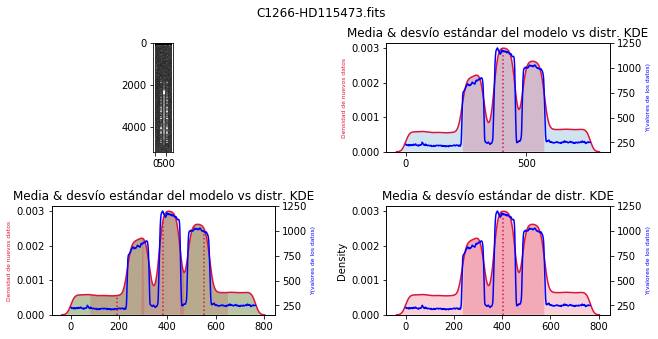

Dimension de los nuevos datos: (236247,)
Datos del modelo:
centroides
[[391.04833077]]
%
[1.]
std
[[[194.00170913]]]
Datos del modelo:
centroides
[[397.02917366]
 [127.37626487]
 [619.12104734]]
%
[0.50500431 0.23572261 0.25927308]
std
[[[85.690355  ]]

 [[80.77040866]]

 [[98.15280569]]]


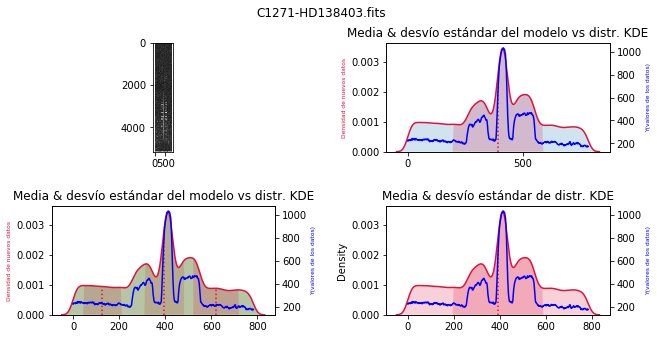

Dimension de los nuevos datos: (971595,)
Datos del modelo:
centroides
[[1720.42241892]
 [ 727.35703415]]
%
[0.29589361 0.70410639]
std
[[[ 34.08874549]]

 [[372.18189593]]]
Datos del modelo:
centroides
[[1381.87962653]
 [ 437.87513459]
 [ 885.86098529]
 [1721.63324934]]
%
[0.11387005 0.36591383 0.22972992 0.29048619]
std
[[[173.42980117]]

 [[174.11684597]]

 [[103.55891539]]

 [[ 32.7134927 ]]]


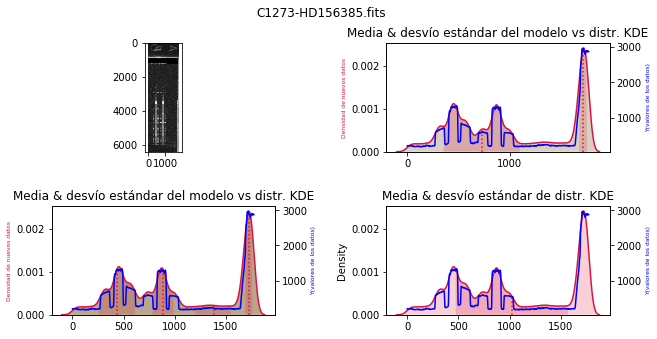

Dimension de los nuevos datos: (1276436,)
Datos del modelo:
centroides
[[1328.74321157]
 [  22.90037258]
 [ 672.65778903]]
%
[0.56136235 0.08404679 0.35459086]
std
[[[281.07942935]]

 [[ 16.65254958]]

 [[328.16055543]]]
Datos del modelo:
centroides
[[  22.0272455 ]
 [1536.13216704]
 [ 777.88042294]
 [1151.77369178]
 [ 307.86433872]]
%
[0.08193649 0.30852614 0.23393108 0.25239851 0.12320777]
std
[[[ 15.68433181]]

 [[174.46003623]]

 [[122.78752068]]

 [[ 78.25107978]]

 [[169.84543402]]]


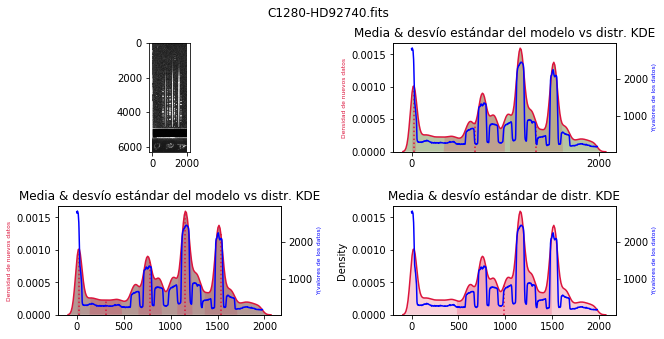

Dimension de los nuevos datos: (1036674,)
Datos del modelo:
centroides
[[ 642.77566504]
 [1644.68758467]]
%
[0.75185857 0.24814143]
std
[[[358.78913313]]

 [[ 33.26461276]]]
Datos del modelo:
centroides
[[ 280.59725826]
 [ 951.20442573]
 [ 537.97148265]
 [1645.45953587]]
%
[0.20049592 0.32572268 0.22960434 0.24417706]
std
[[[138.29451819]]

 [[309.2925511 ]]

 [[156.2771026 ]]

 [[ 32.27393027]]]


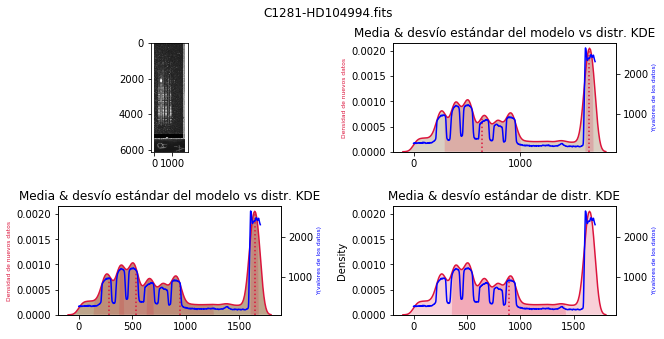

Dimension de los nuevos datos: (745413,)
Datos del modelo:
centroides
[[ 526.70835011]
 [1071.6174699 ]]
%
[0.56781919 0.43218081]
std
[[[220.82764683]]

 [[222.13117114]]]
Datos del modelo:
centroides
[[ 194.17843857]
 [ 993.49893073]
 [ 570.92054378]
 [1340.65296216]]
%
[0.10589739 0.34632794 0.43756446 0.11021021]
std
[[[119.09383865]]

 [[138.79721622]]

 [[122.57484014]]

 [[118.57110721]]]


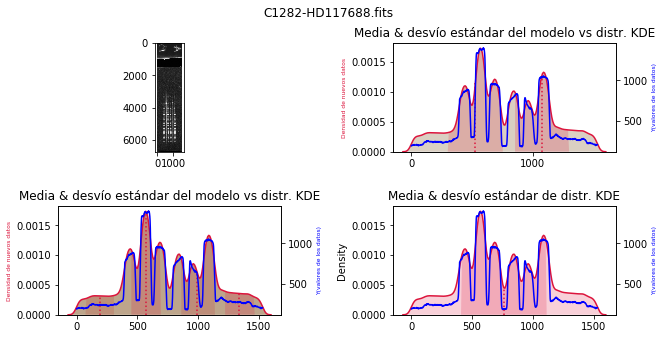

Dimension de los nuevos datos: (348626,)
Datos del modelo:
centroides
[[457.87105379]]
%
[1.]
std
[[[176.637749]]]
Datos del modelo:
centroides
[[414.95861207]
 [ 95.05543466]
 [592.01624014]]
%
[0.51580822 0.08615852 0.39803326]
std
[[[108.71188357]]

 [[ 60.70836762]]

 [[115.75648415]]]


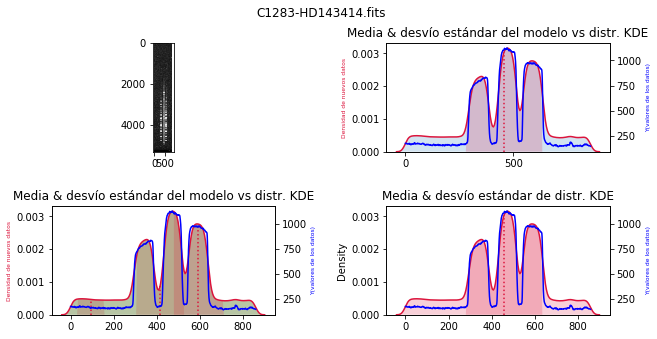

Dimension de los nuevos datos: (1063003,)
Datos del modelo:
centroides
[[ 777.42045527]
 [1734.79579295]]
%
[0.80044266 0.19955734]
std
[[[387.08140555]]

 [[ 23.5801555 ]]]
Datos del modelo:
centroides
[[ 471.58578894]
 [1662.5389935 ]
 [ 337.44202499]
 [ 920.69047126]]
%
[0.10641234 0.28849742 0.20308644 0.4020038 ]
std
[[[ 81.20914059]]

 [[124.6773729 ]]

 [[156.09027179]]

 [[151.92558788]]]


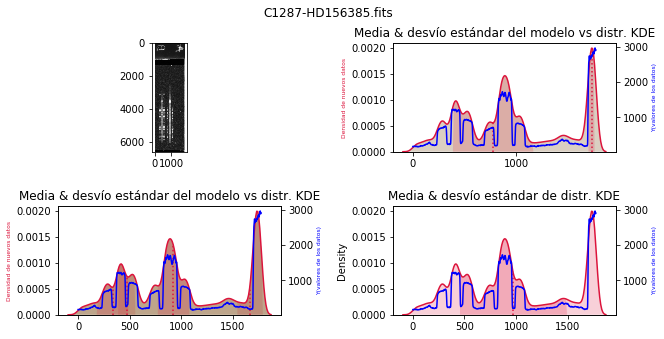

Dimension de los nuevos datos: (1110555,)
Datos del modelo:
centroides
[[ 293.14357013]
 [1191.20555386]]
%
[0.5196602 0.4803398]
std
[[[198.7481111 ]]

 [[368.96737798]]]
Datos del modelo:
centroides
[[ 401.4536114 ]
 [1575.10413067]
 [ 967.62304356]
 [  40.21854621]]
%
[0.359606   0.19182251 0.28032216 0.16824933]
std
[[[ 90.50744749]]

 [[181.30050823]]

 [[148.59750698]]

 [[ 27.53721433]]]


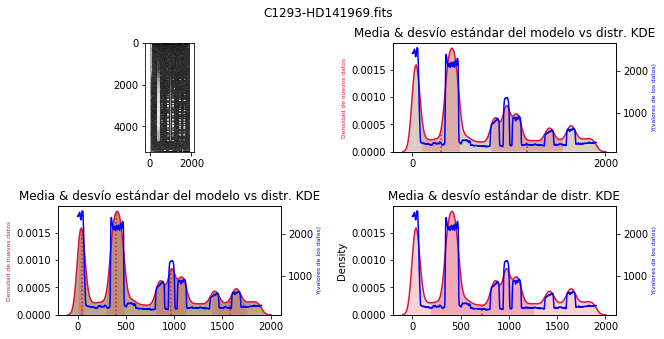

Dimension de los nuevos datos: (1661851,)
Datos del modelo:
centroides
[[ 342.77533624]
 [1565.84130812]
 [ 890.60989138]
 [1239.57338111]]
%
[0.3125939  0.4441485  0.14497295 0.09828464]
std
[[[164.79774882]]

 [[147.08758997]]

 [[127.34875819]]

 [[115.16429368]]]
Datos del modelo:
centroides
[[1287.42225604]
 [ 367.11972326]
 [1541.54411455]
 [ 872.12952871]
 [  28.82751332]
 [1776.15520967]]
%
[0.14356698 0.25179958 0.29535028 0.17612197 0.03955904 0.09360216]
std
[[[103.37536955]]

 [[ 97.60755709]]

 [[ 53.94297922]]

 [[157.12231544]]

 [[ 19.99446659]]

 [[117.41547357]]]


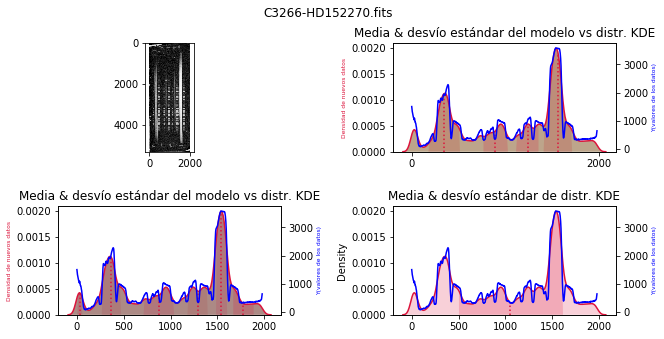

Dimension de los nuevos datos: (1581765,)
Datos del modelo:
centroides
[[1496.85299691]
 [ 813.1797799 ]
 [1178.1101576 ]
 [ 356.37449183]]
%
[0.24462838 0.21484183 0.23232499 0.3082048 ]
std
[[[115.62335441]]

 [[ 98.89657184]]

 [[ 76.90533419]]

 [[149.46125883]]]
Datos del modelo:
centroides
[[ 805.42448709]
 [1235.63772046]
 [ 393.70184129]
 [1499.52105996]
 [1153.42174551]
 [ 138.33829822]]
%
[0.24103517 0.09469979 0.22677619 0.23952045 0.13539131 0.06257708]
std
[[[114.6869164 ]]

 [[ 78.97719716]]

 [[ 83.7633202 ]]

 [[115.13870974]]

 [[ 54.50376027]]

 [[ 87.09084451]]]


KeyboardInterrupt: 

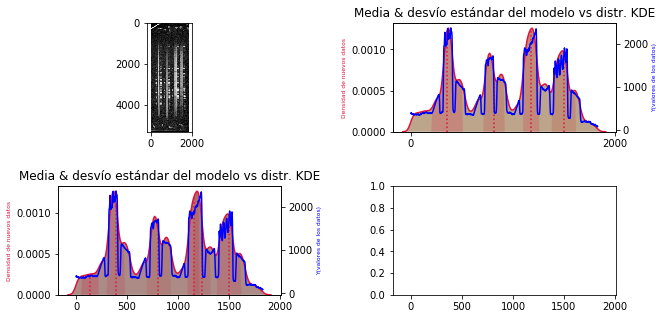

In [13]:
for nombreImg in listaNombres:
    #se obtiene informacion de la img
    datos, clusters = Recursos.getInfo(nombreImg)
    Y = np.sum(Recursos.normalize(datos), axis=0) 
    #se crea para cada caso su nuevo dataset
    #Y_nuevo = (Recursos.generar_nuevos_datos(Y)).reshape(-1,1)
    Y_nuevo = (Recursos.generar_nuevos_datos(Y))
    Y_copia = Y_nuevo.copy().reshape(-1,1)
    componentes = [clusters, clusters+2]
    #se aplica el modelo gmm
    modelos = [None for i in range(len(componentes))]
    for i in range(len(componentes)):
        modelos[i] = Recursos.modelo_gmm(Y_copia, componentes[i])
    #se grafica resultados del modelo vs kde 
    #fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)
    #11-imagen 
    #12-res:clusters*3
    #21-res:clusters*3+extremos(2)
    #22-kde
    
    #se grafica resultados del modelo vs kde 
    fig = plt.figure(nombreImg, figsize=(10,5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    #fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)

    #11-imagen 
    ax1 = fig.add_subplot(2, 2, 1)
    ax1.imshow(datos, cmap='gray')
    #12-res:clusters*3
    ax2 = fig.add_subplot(2, 2, 2, sharex=ax1)
    ax2 = Recursos.graficar_regiones(Y, Y_nuevo, modelos[0],componentes[0])
    #21-res:clusters*3+extremos(2)
    ax3 = fig.add_subplot(2, 2, 3, )
    ax3 = Recursos.graficar_regiones(Y, Y_nuevo, modelos[1],componentes[1])
    #22-kde
    ax4 = fig.add_subplot(2, 2, 4, sharex=ax3)
    ax4 = Recursos.graficar_region_kde(Y, Y_nuevo)
    #fig.tight_layout() 
    fig.suptitle(nombreImg, fontsize=12)
    plt.show()
    
    #guardar figura en local